<a href="https://colab.research.google.com/github/sabazarean/User_Segmentation/blob/main/user_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Task 1:
 Data Exploration

In [4]:

# Load the dataset from my google drive in colab

import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.insert(0, '/content/gdrive/My Drive/')

Mounted at /content/gdrive


In [5]:
# Data Preview
data = pd.read_excel('gdrive/My Drive/P2_user_segmentation.xlsx')

data

,Mobile Key,Person Is Alive,Person Birth Date,Person Gender Title,Person First Name,Person Last Name,Mobile Number Encrypt,Mobile Number Masked,FirstAppInstallDate,Mobile Operator Id,...,CMS_Balance,LastTrsDateWallet,FirstProvince,SecondProvince,FirstRegion,SecondRegion,FirstGuild,SecondGuild,ThirdGuild,AllGuild
0,2,True,1997-10-09,مرد,مجید,ملکی,HN8x8N88m+sikOUIs4Iuxg==,0938***0926,2017-04-18 20:15:22.910,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaT,NaN,NaN,NaN,/Y38H9ETC2tMantBTYBQzw==,0913***9963,2014-12-15 21:59:03.870,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,NaT,NaN,NaN,NaN,ThuZBrT+/BueLw7LxSX15w==,0919***0132,2016-04-18 10:15:01.480,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,True,1979-07-13,مرد,حمیدرضا,عزیزی مربویه,0sEbFPeIKs9cCJLA73cOoQ==,0917***4959,2020-01-13 23:07:15.570,1,...,NaN,NaN,فارس,فارس,شيراز,شيراز,5411,"5499,5311",5811,"5411,5441,7538,5533,5462,8062,5533,5411,5814,7..."
4,9,True,1979-03-11,مرد,امیدعلی,احمدپور,FZT2oVrc5UCFaN8gjELmCg==,0917***8979,2016-11-22 22:03:27.060,1,...,568580.0,2023-07-23 13:56:44,فارس,فارس,مرودشت,شيراز,5411,5251,5411,"1731,5261,5411,5812,5065,5065,5814,5441,5411,8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,125060,NaN,NaT,NaN,NaN,NaN,pDcHaQlw4rFir+7T1rBFEQ==,0915***7614,2017-11-16 21:45:59.757,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,125068,True,1979-03-21,مرد,حمید,پارسای جرفی,/Iv74VOVi1nIVBK006oiTA==,0915***6893,2018-07-06 19:38:36.493,1,...,NaN,NaN,خراسان رضوي,خراسان رضوي,مشهد,کلات,5462,5411,"8931,5251,5169,5499","5533,5411,5691,5462,7216,5814,5811,8931,5300,7..."
49997,125071,NaN,NaT,NaN,NaN,NaN,SFqmPCgQQuhu9iyXJNxG+Q==,0914***7368,2021-09-04 20:47:17.843,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,125072,NaN,NaT,NaN,NaN,NaN,QsN0ea3HyEgMsqZpmq/ywA==,0917***4369,2016-08-02 20:37:16.367,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.head())

   Mobile Key Person Is Alive Person Birth Date Person Gender Title  \
0           2            True        1997-10-09                 مرد   
1           4             NaN               NaT                 NaN   
2           6             NaN               NaT                 NaN   
3           7            True        1979-07-13                 مرد   
4           9            True        1979-03-11                 مرد   

  Person First Name Person Last Name     Mobile Number Encrypt  \
0              مجید             ملکی  HN8x8N88m+sikOUIs4Iuxg==   
1               NaN              NaN  /Y38H9ETC2tMantBTYBQzw==   
2               NaN              NaN  ThuZBrT+/BueLw7LxSX15w==   
3           حمیدرضا     عزیزی مربویه  0sEbFPeIKs9cCJLA73cOoQ==   
4           امیدعلی          احمدپور  FZT2oVrc5UCFaN8gjELmCg==   

  Mobile Number Masked     FirstAppInstallDate  Mobile Operator Id  ...  \
0          0938***0926 2017-04-18 20:15:22.910                   2  ...   
1          0913***9963 201

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 106 entries, Mobile Key to AllGuild
dtypes: datetime64[ns](2), float64(77), int64(3), object(24)
memory usage: 40.4+ MB
None


Detecting Missing Values

In [ ]:
print(data.isnull().sum())

Mobile Key                 0
Person Is Alive        33819
Person Birth Date      34421
Person Gender Title    33851
Person First Name      33819
                       ...  
SecondRegion           39957
FirstGuild             38353
SecondGuild            39352
ThirdGuild             41023
AllGuild               38353
Length: 106, dtype: int64


In [ ]:
data.isnull().sum() * 100 / len(data)

,0
Mobile Key,0.000
Person Is Alive,67.638
Person Birth Date,68.842
Person Gender Title,67.702
Person First Name,67.638
...,...
SecondRegion,79.914
FirstGuild,76.706
SecondGuild,78.704
ThirdGuild,82.046


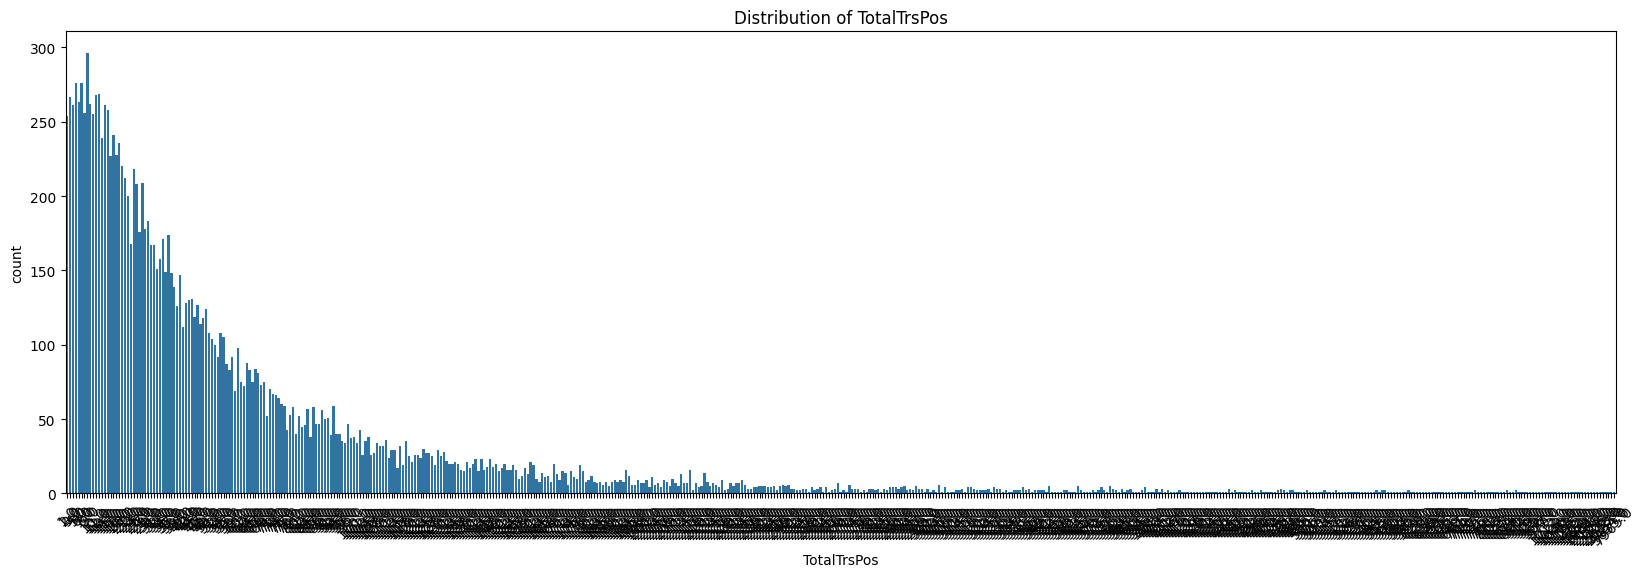

In [6]:
# Exploratory Visualizations
plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='TotalTrsPos')  # Change 'service_used' to actual column name
plt.title('Distribution of TotalTrsPos')
plt.xticks(rotation=45)
plt.show()
